## Spatial-Data-Analysis
## Exercise 3
Artur Szewczykowski

<b>Purpose: Create an interactive map showing where the common raven can be seen in Finland in 2021. </b>

In [1]:
import geopandas as gpd
import folium
from folium import FeatureGroup
from folium.plugins import MarkerCluster, HeatMap

<b>1. Load data.</b>

In [2]:
observations = gpd.read_file('observations.shp')

<b>2. Data projection.</b>

In [3]:
observations = observations.set_crs(epsg=4326)

<b>3. An interactive map showing where the common raven can be seen in Finland in 2021.</b>


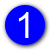
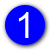
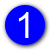
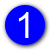
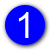
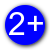
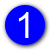
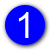
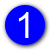
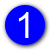
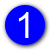
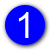
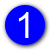
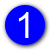
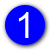
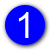
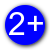
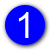
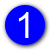
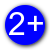
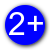
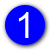
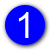
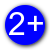
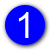
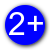
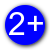
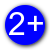
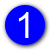
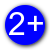
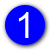
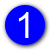
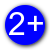
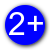
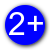
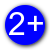
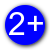
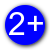
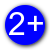
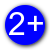
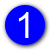
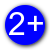
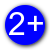
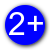
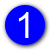
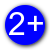
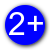
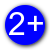
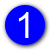
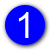
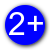
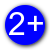
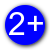
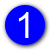
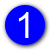
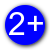
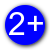
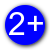
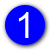
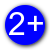
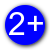
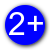
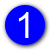
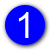
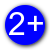
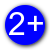
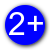
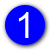
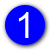
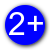
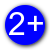
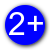
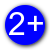
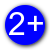
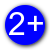
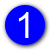
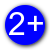
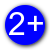
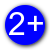
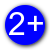
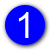
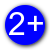
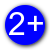
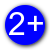
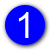
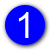
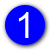
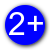
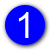
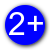
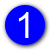
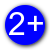
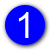
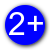
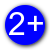
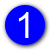
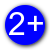
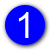
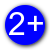
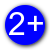
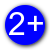
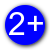
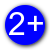
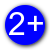
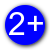
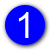
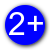
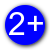
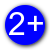
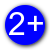
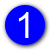
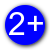
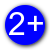
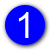
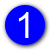
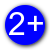
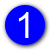
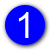
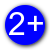
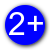
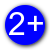
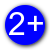
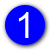
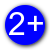
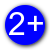
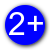
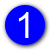
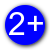
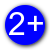
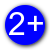
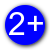
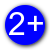
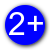
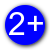
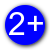
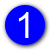
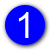
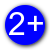
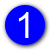
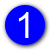
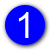
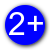
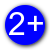
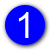
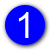
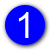
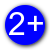
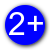
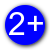
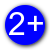
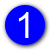
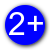
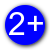
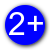
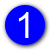
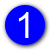
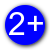
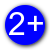
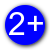
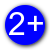
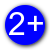
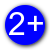
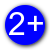
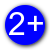
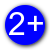
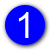
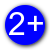
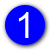
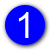
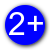
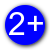
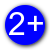
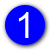
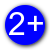
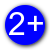
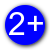
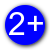
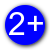
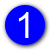
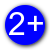
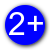
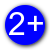
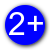
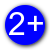
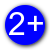
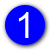
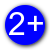
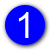
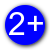
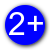
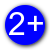
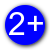
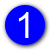
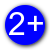
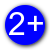
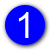
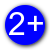
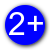
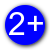
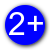
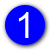
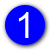
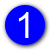
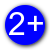
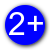
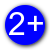
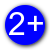
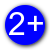
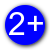
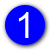
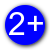
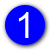
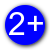
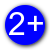
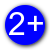
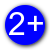
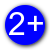
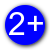
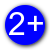
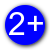
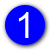
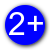
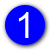
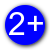
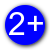
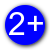
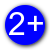
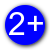
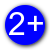
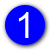
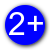
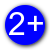
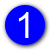
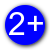
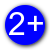
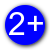
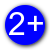
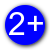
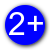
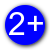
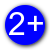
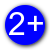
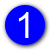
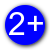
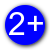
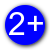
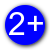
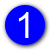
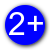
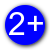
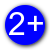
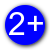
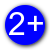
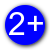
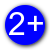
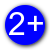
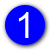
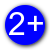
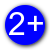
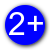
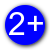
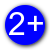
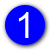
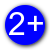
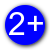
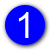
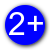
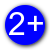
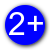
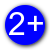
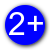
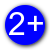
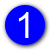
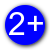
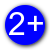
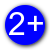
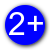
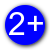
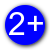
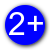
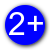
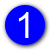
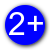
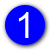
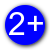
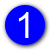
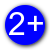
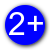
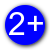
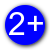
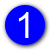
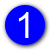
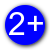
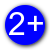
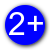
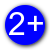
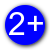
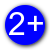
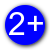
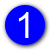
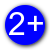
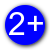
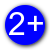
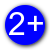
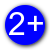
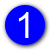
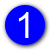
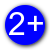
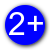
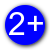
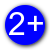
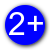
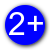
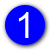
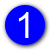
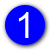
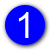
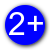
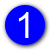
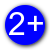
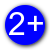
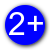
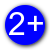
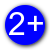
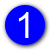
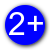
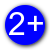
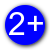
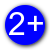
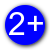
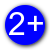
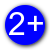
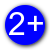
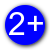
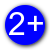
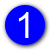
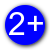
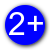
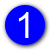
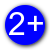
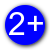
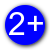
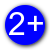
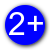
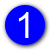
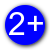
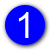
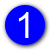
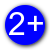
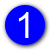
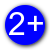
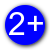
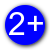
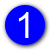
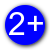
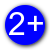
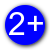
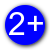
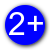
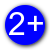
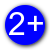
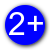
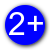
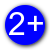
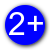
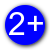
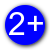
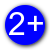
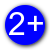
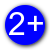
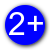
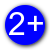
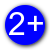
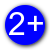
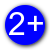
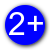
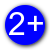
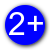
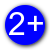
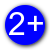
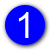
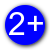
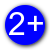
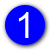
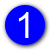
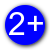
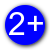
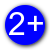
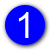
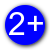
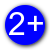
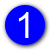
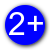
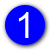
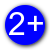
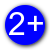
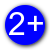
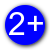
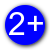
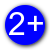
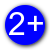
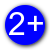
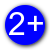
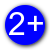
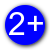
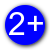
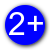
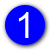
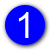
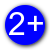
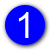
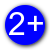
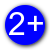
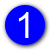
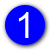
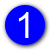
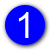
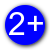
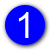
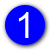
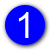
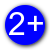
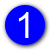
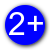
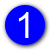
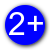
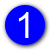
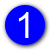
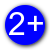
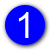
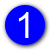
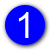
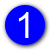
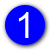
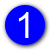
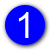
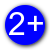
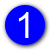
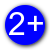
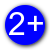
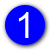
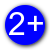
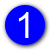
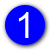
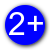
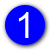
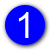
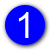
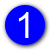
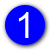
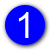
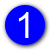
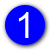
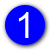
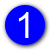
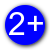
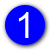
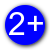
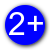
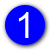
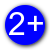
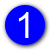
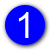
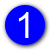
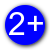
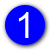
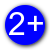
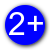
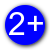
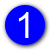
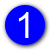
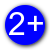
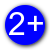
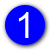
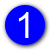
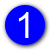
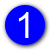
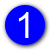
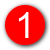
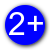
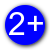
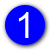
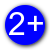
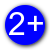
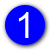
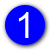
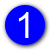
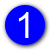
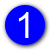
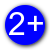
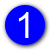
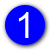
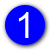
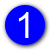
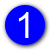
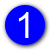
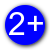
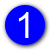
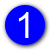
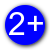
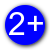
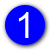
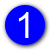
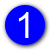
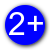
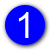
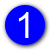
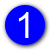
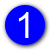
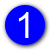
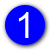
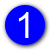
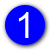
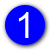
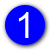
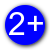
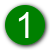
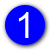
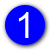
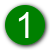
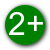
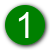
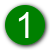
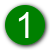
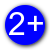
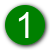
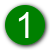
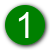
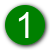
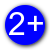
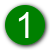
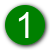
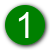
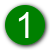
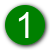
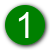
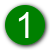
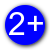
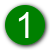
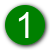
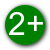
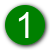
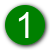
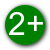
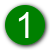
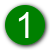
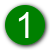
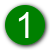
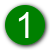
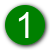
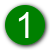
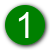
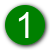
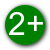
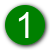
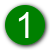
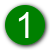
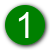
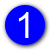
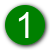
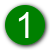
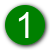
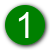
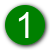
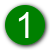
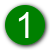
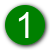
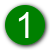
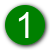
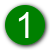
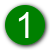
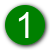
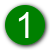
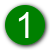
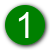
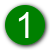
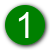
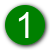
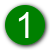
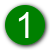
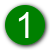
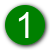
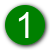
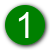
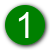
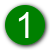
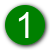
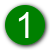
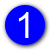
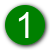
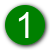
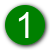
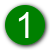
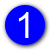
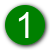
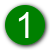
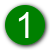
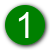
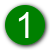
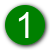
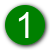
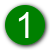
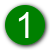
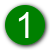
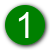
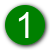
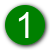
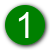
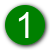
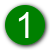
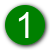
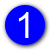
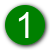
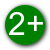
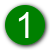
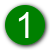
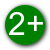
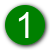
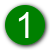
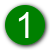
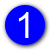
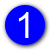
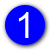
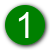
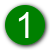
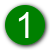
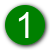
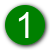
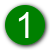
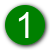
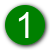
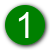
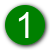
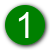
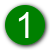
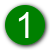
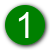
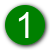
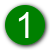
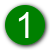
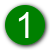
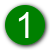
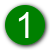
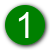
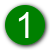
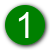
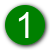
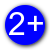
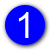
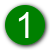
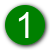
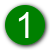
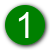
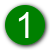
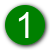
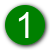
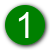
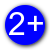
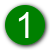
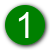
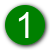
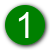
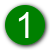
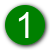
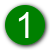
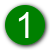
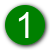
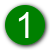
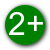
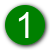
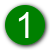
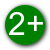
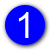
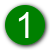
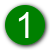
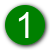
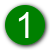
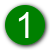
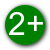
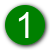
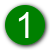
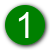
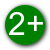
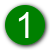
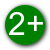
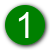
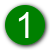
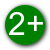
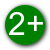
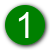
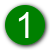
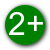
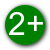
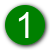
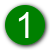
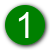
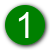
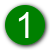
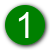
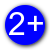
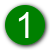
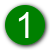
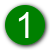
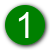
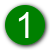
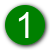
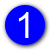
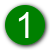
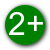
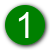
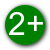
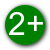
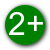
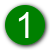
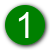
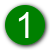
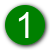
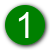
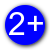
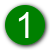
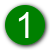
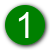
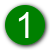
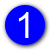
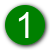
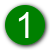
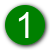
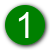
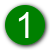
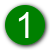
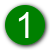
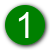
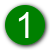
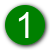
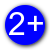
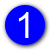
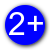
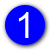
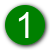
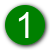
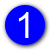
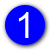
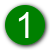
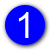
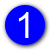
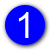
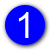
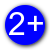
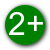
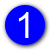
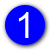
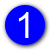
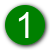
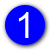
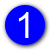
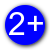
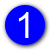
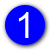
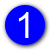
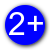
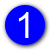
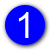
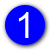
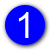
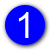
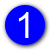
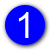
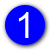
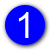
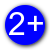
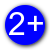
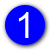
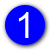
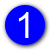
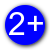
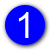
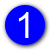
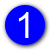
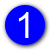
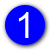
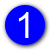
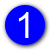
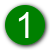
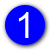
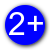
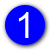
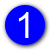
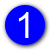
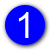
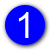
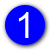
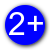
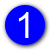
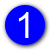
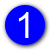
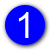
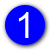
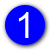
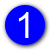
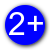
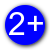
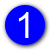
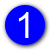
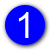
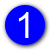
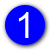
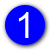
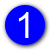
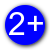
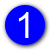
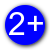
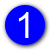
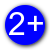
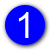
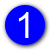
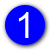
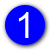
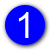
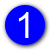
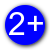
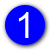
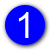
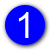
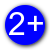
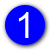
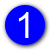
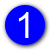
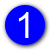
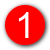
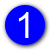
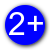
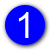
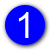
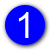
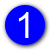
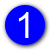
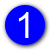
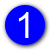
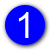
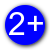
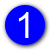
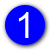
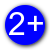
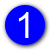
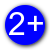
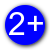
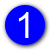
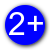
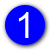
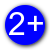
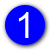
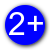
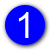
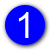
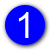
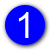
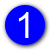
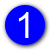
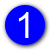
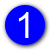
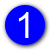
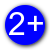
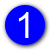
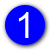
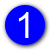
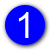
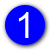
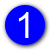
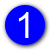
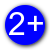
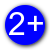
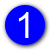
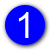
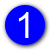
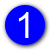
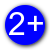
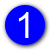
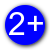
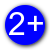
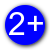
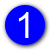
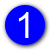
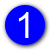
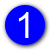
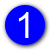
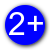
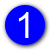
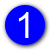
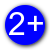
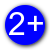
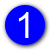
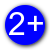
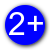
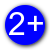
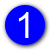
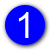
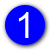
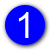
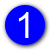
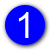
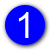
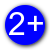
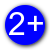
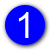
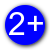
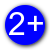
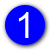
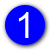
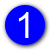
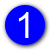
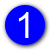
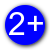
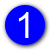
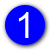
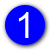
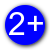
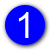
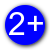
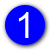
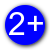
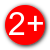
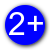
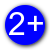
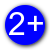
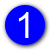
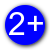
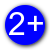
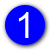
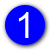
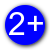
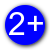
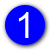
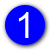
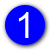
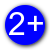
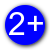
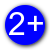
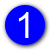
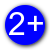
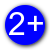
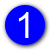
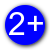
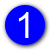
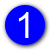
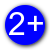
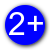
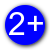
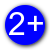
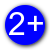
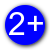
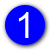
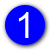
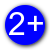
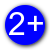
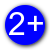
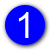
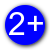
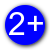
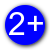
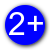
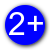
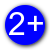
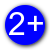
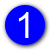
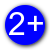
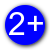
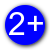
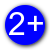
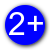
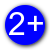
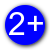
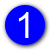
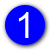
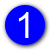
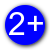
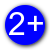
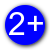
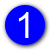
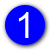
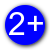
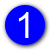
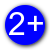
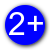
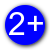
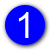
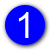
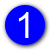
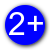
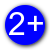
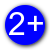
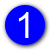
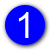
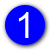
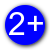
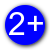
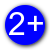
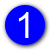
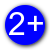
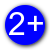
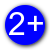
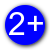
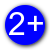
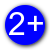
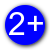
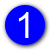
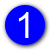
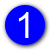
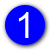
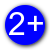
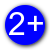
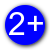
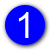
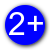
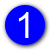
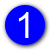
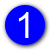
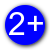
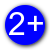
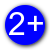
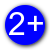
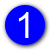
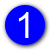
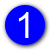
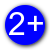
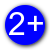
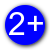
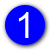
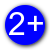
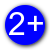
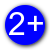
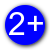
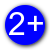
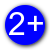
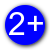
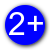
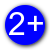
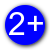
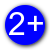
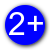
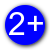
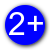
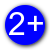
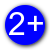
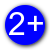
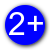
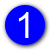
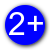
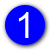
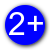
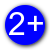
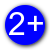
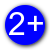
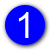
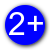
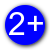
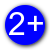
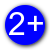
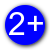
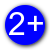
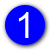
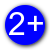
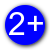
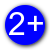
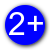
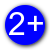
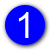
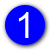
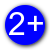
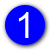
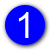
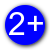
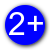
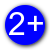
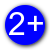
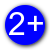
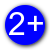
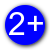
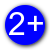
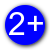
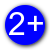
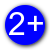
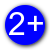
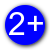
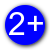
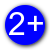
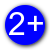
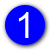
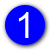
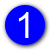
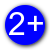
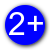
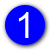
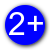
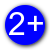
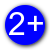
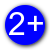
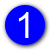
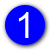
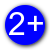
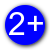
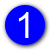
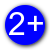
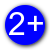
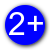
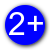
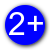
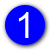
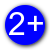
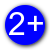
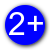
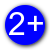
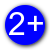
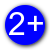
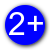
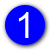
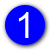
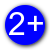
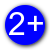
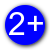
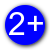
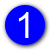
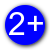
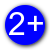
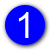
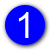
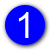
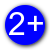
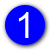
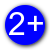
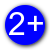
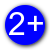
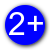
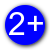
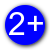
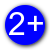
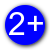
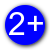
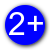
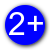
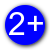
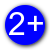
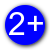
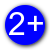
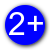
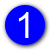
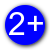
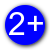
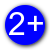
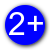
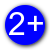
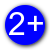
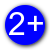
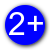
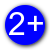
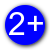
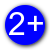
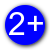
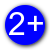
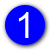
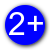
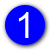
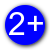
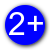
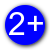
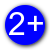
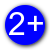
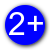
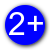
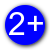
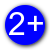
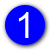
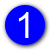
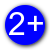
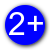
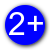
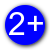
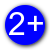
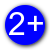
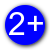
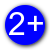
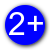
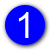
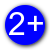
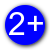
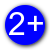
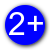
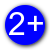
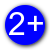
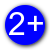
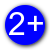
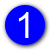
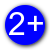
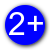
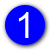
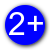
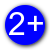
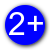
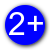
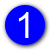
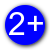
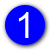
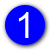
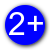
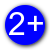
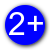
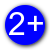
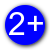
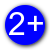
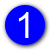
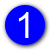
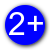
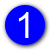
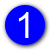
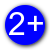
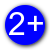
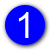
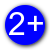
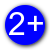
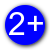
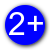
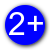
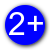
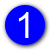
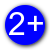
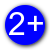
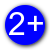
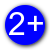
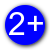
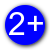
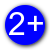
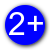
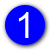
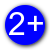
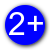
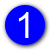
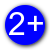
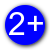
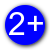
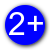
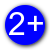
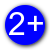
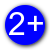
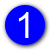
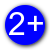
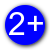
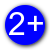
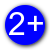
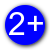
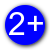
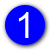
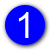
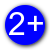
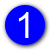
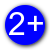
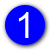
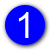
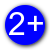
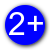
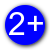
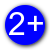
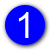
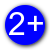
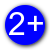
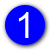
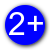
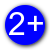
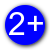
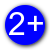
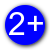
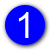
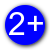
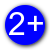
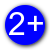
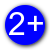
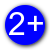
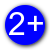
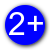
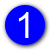
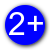
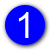
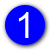
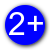
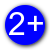
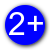
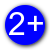
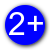
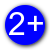
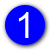
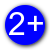
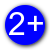
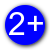
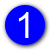
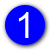
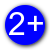
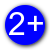
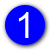
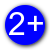
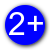
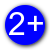
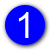
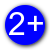
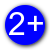
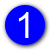
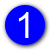
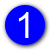
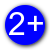
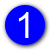
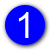
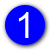
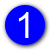
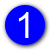
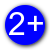
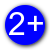
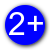
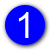
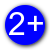
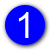
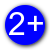
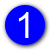
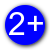
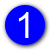
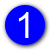
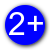
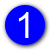
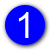
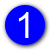
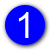
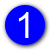
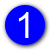
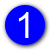
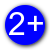
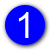
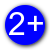
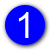
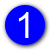
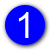
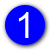
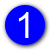
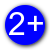
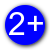
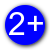
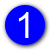
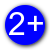
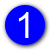
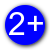
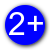
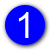
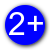
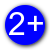
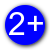
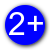
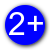
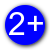
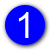
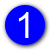
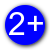
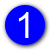
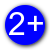
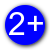
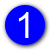
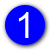
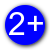
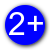
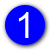
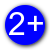
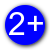
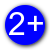
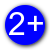
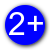
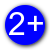
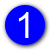
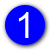
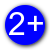
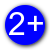
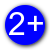
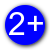
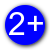
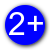
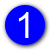
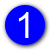
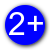
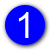
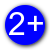
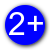
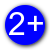
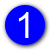
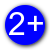
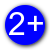
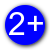
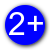
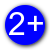
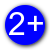
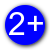
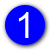
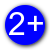
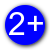
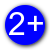
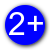
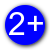
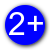
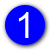
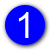
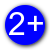
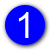
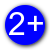
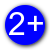
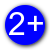
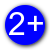
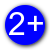
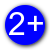
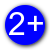
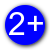
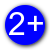
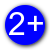
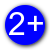
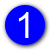
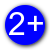
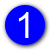
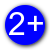
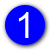
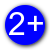
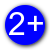
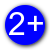
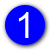
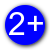
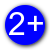
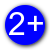
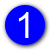
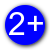
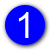
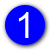
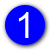
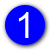
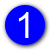
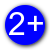
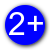
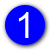
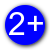
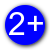
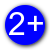
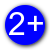
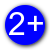
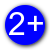
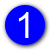
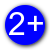
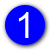
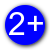
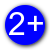
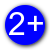
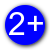
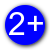
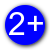
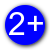
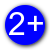
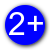
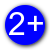
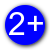
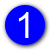
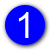
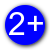
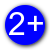
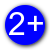
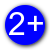
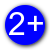
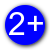
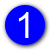
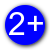
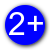
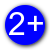
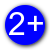
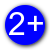
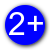
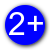
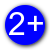
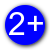
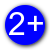
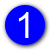
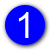
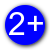
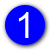
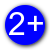
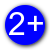
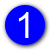
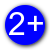
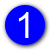
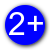
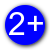
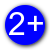
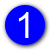
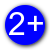
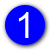
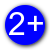
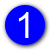
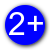
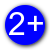
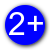
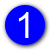
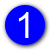
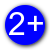
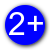
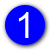
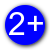
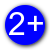
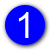
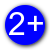
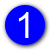
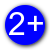
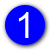
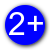
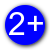
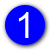
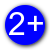
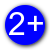
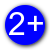
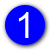
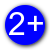
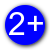
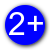
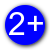
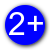
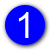
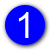
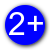
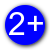
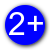
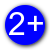
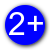
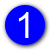
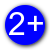
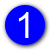
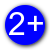
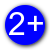
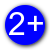
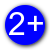
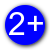
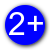
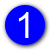
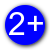
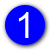
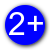
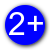
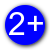
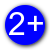
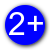
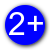
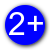
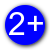
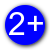
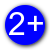
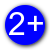
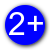
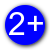
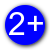
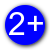
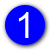
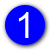
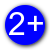
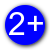
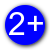
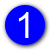
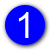
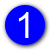
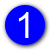
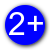
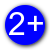
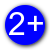
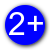
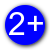
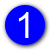
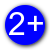
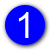
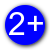
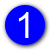
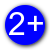
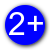
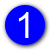
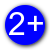
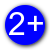
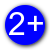
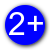
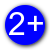
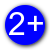
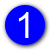
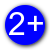
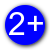
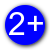
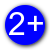
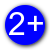
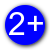
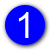
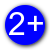
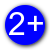
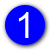
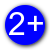
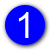
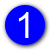
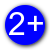
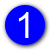
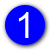
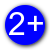
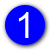
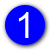

In [4]:
m = folium.Map(location=[65.5, 24], zoom_start=4.5) #Finland coordinates
folium.TileLayer('cartodbpositron', name='CartoDB Positron').add_to(m) #different styles

#1st layer - GeoJson
geojson_layer = folium.GeoJson(
    observations,
    name="Observations (GeoJSON)",
    tooltip=folium.GeoJsonTooltip(
        fields=["date"],
        aliases=[ "Observation Date:"],
        localize=True
    ),
    show=False #hidden by default
).add_to(m)

#2nd layer - HeatMap
heat_data = [
    [row.geometry.y, row.geometry.x, row['amount']]
    for idx, row in observations.iterrows()
]
HeatMap(
    heat_data,
    name="Observations Heatmap",
    radius=15,
    blur=10,
    max_zoom=7,
    show=False
).add_to(m)

#3rd layer - Markers Clusters
def choose_icon(observer_type, amount): #different kinds&colors of icons
    color_map = {
        "Hobbyist": "blue",
        "Professional": "green"
    }
    default_color = "red"
    color = color_map.get(observer_type, default_color) #colors of icons
    
    amount = int(amount) #kinds of icons
    if amount > 1:
        icon_filename = f"markers/marker_2+_{color}.png" #more than one bird
    else:
        icon_filename = f"markers/marker_1_{color}.png" #only one bird
    return folium.CustomIcon(icon_filename, icon_size=(30, 30))

locations = list(zip(
    observations.geometry.y,
    observations.geometry.x,
    observations['observer'],
    observations['species'],
    observations['amount']
))

marker_cluster_layer = FeatureGroup(name="Clustered Observations", show=False)
marker_cluster = MarkerCluster().add_to(marker_cluster_layer)

for lat, lon, observer, species, amount in locations:
    folium.Marker(
        location=[lat, lon],
        popup=(
            f"<b>Observer Type:</b> {observer}<br>" #tags descriptions
            f"<b>Species:</b> {species}<br>"
            f"<b>Amount:</b> {amount}"
        ),
        icon=choose_icon(observer, amount) #different kinds&colors of icons
    ).add_to(marker_cluster)

marker_cluster_layer.add_to(m)

folium.LayerControl().add_to(m); #layer control

m.save("Exercise_3_map.html")

m